# Data Analysis
## Overview

In this notebook, we will look at overall trend and descriptive stats, such as what is the most popular films or the most profitable films, the proportion of MPAA, etc., without further diving into the relationship.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#loading data
df = pd.read_csv('data/profit_data.csv', index_col = 0)
df.head(3)

,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,...,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers
0,31.998,2653,189,False,en,sin city: a dame to kill for,6.3,Some of Sin City's most hard-boiled citizens c...,R,2014,...,2014,102.0,"Crime,Thriller",6.5,140666,"Josh Brolin,Mickey Rourke,Jessica Alba,Joseph ...","Frank Miller,Robert Rodriguez","Mark C. Manuel,Sergei Bespalov,Aaron Kaufman,S...",NaN,NaN
1,14.736,15131,1771,False,en,captain america: the first avenger,6.9,"During World War II, Steve Rogers is a sickly ...",PG-13,2011,...,2011,124.0,"Action,Adventure,Sci-Fi",6.9,668137,"Chris Evans,Samuel L. Jackson,Hugo Weaving,Hay...",Joe Johnston,Kevin Feige,NaN,"Jack Kirby,Christopher Markus,Stephen McFeely,..."
2,24.337,10020,1865,False,en,pirates of the caribbean: on stranger tides,6.5,Captain Jack Sparrow crosses paths with a woma...,PG-13,2011,...,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,"Johnny Depp,Geoffrey Rush,Ian McShane,Penélope...",Rob Marshall,NaN,NaN,"Stuart Beattie,Ted Elliott,Terry Rossio,Tim Po..."


In [12]:
df.columns

Index(['popularity', 'vote_count', 'id_x', 'adult', 'original_language',
       'title', 'vote_average', 'overview', 'MPAA', 'year', 'studio',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'tconst',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'avg_rating_imdb', 'num_votes_imdb', 'actors', 'directors',
       'producers', 'editors', 'writers'],
      dtype='object')

## Overall 

### Number of films 

In [13]:
print(f"We currently have {len(df)} values in our dataset")

We currently have 1218 values in our dataset


In [14]:
print(f"Out of which {df.title.nunique()} films with unique name")

Out of which 1192 films with unique name


In [15]:
df.isnull().sum()

popularity              0
vote_count              0
id_x                    0
adult                   0
original_language       0
title                   0
vote_average            0
overview                0
MPAA                  135
year                    0
studio                200
production_budget       0
domestic_gross          0
worldwide_gross         0
tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes         4
genres                  2
avg_rating_imdb         0
num_votes_imdb          0
actors                  9
directors              37
producers             143
editors              1068
writers               183
dtype: int64

### MPAA Distribution

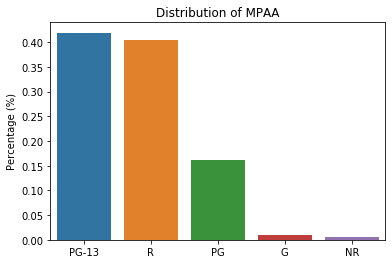

In [37]:
Y = df.MPAA.value_counts(normalize = True)
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of MPAA")
plt.ylabel("Percentage (%)")
plt.show()

### Studio Distribution 

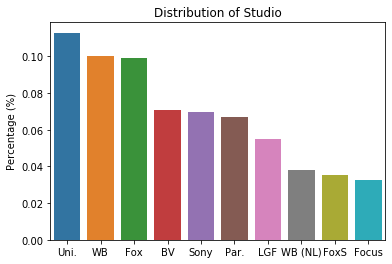

In [38]:
Y = df.studio.value_counts(normalize = True)[0:10]
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of Studio")
plt.ylabel("Percentage (%)")
plt.show()

### Original Language distribution

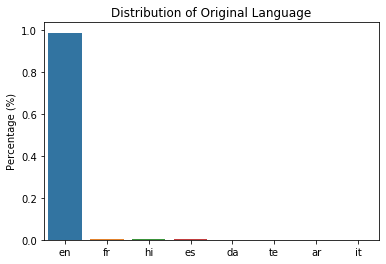

In [39]:
Y = df.original_language.value_counts(normalize = True)[0:10]
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of Original Language")
plt.ylabel("Percentage (%)")
plt.show()

### Budget Distribution

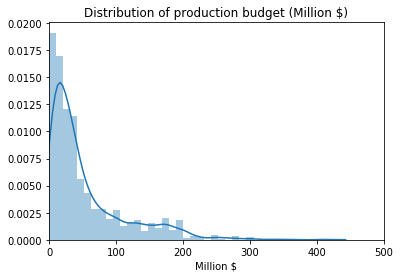

In [45]:
Y = df.production_budget.sort_values()

sns.distplot(Y)
plt.title("Distribution of production budget (Million $)")
plt.xlabel("Million $")
plt.xlim([0, 500])
plt.show()

### Gross Distribution (domestic, worldwide)

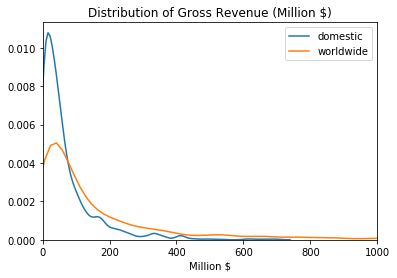

In [55]:
Y = df.domestic_gross.sort_values()
Z = df.worldwide_gross.sort_values()
sns.distplot(Y, label = 'domestic', hist = False)
sns.distplot(Z, label = 'worldwide', hist = False)

plt.title("Distribution of Gross Revenue (Million $)")
plt.legend()
plt.xlabel("Million $")
plt.xlim([0, 1000])
plt.show()

### Budget to Gross Domestic

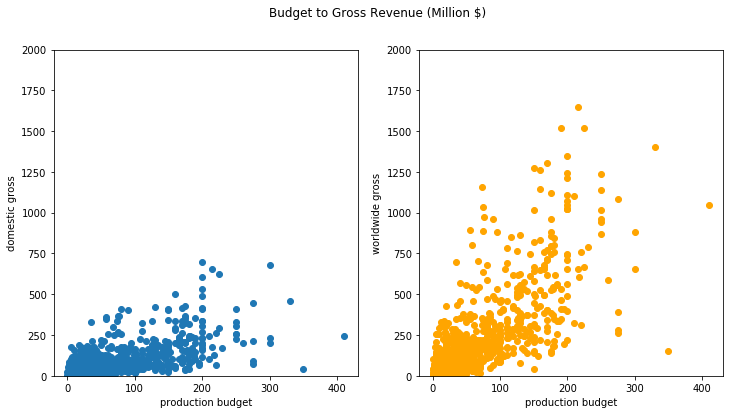

In [72]:
tmp = df[['production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')
X = tmp['production_budget']
Y = tmp['domestic_gross']
Z = tmp['worldwide_gross']

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X, Y)
ax2.scatter(X, Z, c = 'orange')

fig.suptitle("Budget to Gross Revenue (Million $)")
ax1.set_ylabel("domestic gross")
ax2.set_ylabel("worldwide gross")
ax1.set_xlabel("production budget")
ax2.set_xlabel("production budget")
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])


plt.show()


### Average Runtimes

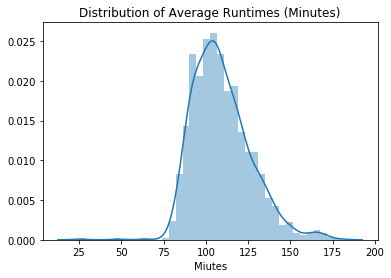

In [80]:
Y = df.runtime_minutes.dropna().sort_values()

sns.distplot(Y)

plt.title("Distribution of Average Runtimes (Minutes)")
plt.xlabel("Miutes")
plt.show()

### Genres Distribution

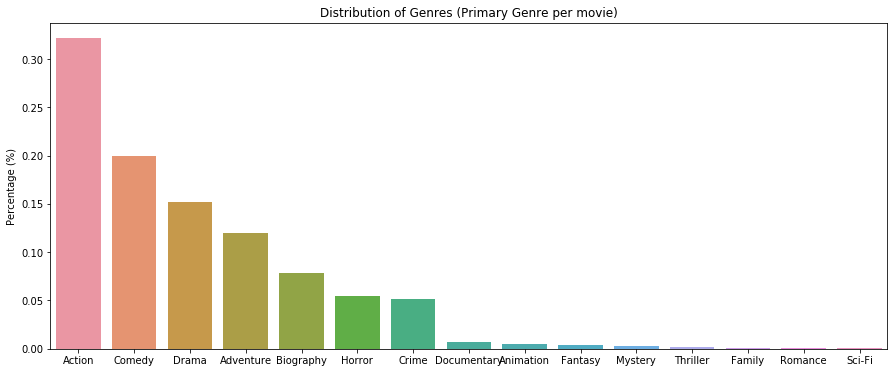

In [107]:
df['primary_genre'] = df.genres.str.split(',', n = 1, expand = True)[0]

Y = df['primary_genre'].value_counts(normalize = True)
X = Y.index

fig = plt.figure(figsize = (15, 6))
sns.barplot(X, Y)
plt.title("Distribution of Genres (Primary Genre per movie)")
plt.ylabel("Percentage (%)")
plt.show()


## Popularity

### What are the most popular films? (Based on the TMDB popularity data)

In [111]:
df.sort_values(by='popularity', ascending = False).title[0:10]

594              journey 2: the mysterious island
1898                       avengers: infinity war
1146                                 interstellar
65                                      inception
991     the hobbit: the battle of the five armies
2775                                      aladdin
916                                        frozen
862                  teenage mutant ninja turtles
1025        the hunger games: mockingjay - part 1
1236                                   big hero 6
Name: title, dtype: object

## Rating

### What are the highest rated films? (IMDB)

In [128]:
df.sort_values(by='avg_rating_imdb', ascending = False).title[0:10]

65                   inception
1146              interstellar
1898    avengers: infinity war
1529                  whiplash
2355                    dangal
540           django unchained
2331                      coco
315      the dark knight rises
243                 inside job
12                 toy story 3
Name: title, dtype: object

## Revenue to Budget Ratio 
We will assume that high revenue to production budget ratio means high profitability.

In [129]:
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_int'] = df.worldwide_gross/df.production_budget

### Which films have the best budget to gross ratio since 2000? Internationally and domestically?

In [130]:
df.sort_values(by='rev2bud_dom', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
2760                  get out
192     paranormal activity 2
135         the last exorcism
2044                 war room
1166                the purge
597     paranormal activity 3
2450                moonlight
834         chernobyl diaries
Name: title, dtype: object

### Which studios have the highest revenue to budget ratio? Internationally and domestically?

In [131]:
df.sort_values(by='rev2bud_int', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
192     paranormal activity 2
2760                  get out
2450                moonlight
834         chernobyl diaries
597     paranormal activity 3
1553                annabelle
135         the last exorcism
2355                   dangal
Name: title, dtype: object

It seems like horror movies yields generally high revenue to budget. This is worth exploring further.
